# Identifying sentences that convey meaningful semantic relation between entities within the sentence - Comparing Classification and Regression for error analysis (Analysis of 50 samples)

The goal of this notebook is to analyze the prediction outcomes for 50 randomly chosen samples from the test set.
- **Dataset used:** data500. 
- **Selected samples:** the first 50 samples from the test set.

To compare and evaluate the different approaches, we will focus on the following outcomes of the *classification models* that achieved the best validation accuracy, and were already introduced in part 8:

- **Model 1:** Using predictions from experiment 63 (The classification was performed using a PMI score with a neural network having dimensions of [256 128 64] neurons, a learning rate of 0.001, and a batch size of 64).
- **Entity Count heuristic:** Using predictions from experiment 298 (where sentences with 10 or fewer entities were labeled as True, and False otherwise).
- **Mask Distance Heuristic:**  Using predictions from experiment 343 (where sentences with a distance of up to 2 tokens between the masked entities were labeled as True, and False otherwise).
- **Random Score heuristic:** Using predictions from experiment 574 (Where True and False were assigned randomly).

In addition, in this notebook we'll add 2 *regression* models that got the minimal validation MSE score while trying to predict the PMI:

- **Model 1:** Using predictions from experiment 56 (The regression was performed with a neural network having dimensions of [128 512 256] neurons, a learning rate of 0.001, and a batch size of 256).
- **Model 2:** Using predictions from experiment 56 as well (The regression was performed with a neural network having dimensions of [128 512] neurons and a network for labels prediction with [512 64] neurons, a learning rate of 0.001, and a batch size of 256).

We will compare these predictions against two types of desired target labels:

- **PMI target label:** In this context, artificial labeling of pairs occurs, with a value of 1 assigned to pairs exceeding the median PMI score of the dataset.
- **Human-labeled target label:** This refers to labels I personally assigned to pairs of items based on manual assessment.

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
file_path = 'results.csv'

df = pd.read_csv(file_path, index_col=0)
df.head()

,Human taget label,PMI target label,Model1-63,EntityCount-298,MaskDistance-343,RandomScore-574,Regression-Model1-56,Regression-Model2-56
149767,1,1,0.282758,0.017544,0.063063,1,2.350161,2.798429
18428,0,0,0.716837,0.052632,0.072072,0,4.814163,4.558007
839724,0,1,0.579796,0.000000,0.045045,0,3.805141,4.461097
274601,0,0,0.526484,0.087719,0.180180,0,2.261571,2.933873
2112143,0,0,0.352927,0.105263,0.198198,0,2.613538,3.004216


In [3]:
def plot_ROC(df, target_column, score_columns):
    plt.figure(figsize=(10, 6))

    true_labels = df[target_column]

    for score_column in score_columns:
        fpr, tpr, _ = roc_curve(true_labels, df[score_column])        
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{score_column} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


### ROC and AUC according to PMI target labels

In [1]:
plot_ROC(df, target_column = 'PMI target label', score_columns = ['Model1-63', 'EntityCount-298', 'MaskDistance-343', 'RandomScore-574','Regression-Model1-56','Regression-Model2-56'])

NameError: name 'plot_ROC' is not defined

### ROC and AUC according to Human-labeled target label

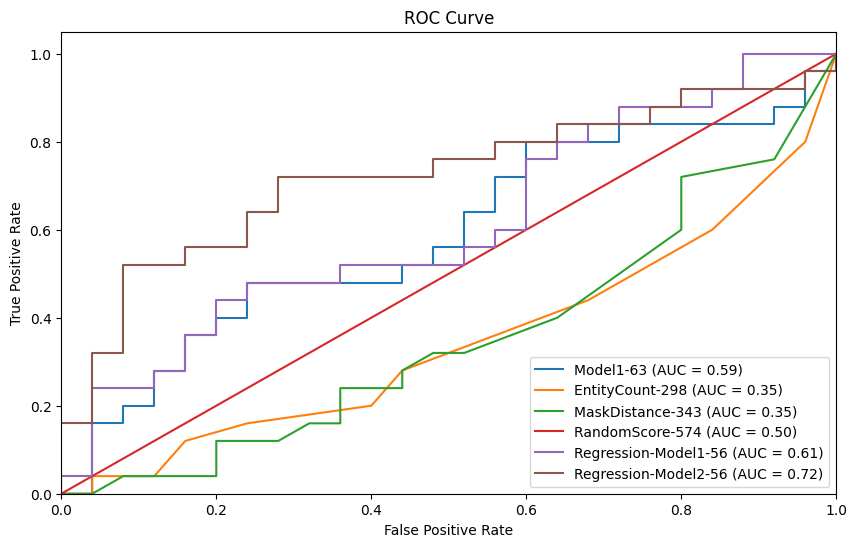

In [6]:
plot_ROC(df, target_column = 'Human taget label', score_columns = ['Model1-63', 'EntityCount-298', 'MaskDistance-343', 'RandomScore-574','Regression-Model1-56','Regression-Model2-56'])

## Conclusion

The sentences were ranked based on high PMI scores in the regression task. It's clear that regression model 2, which also attempted to predict the types of tested entities, outperformed other models, especially in terms of human tagging.